<a href="https://colab.research.google.com/github/jimmy-io/worksheeets-/blob/master/python_stats_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from __future__ import division



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Mann - Whitney U test

In [1]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=4025.000, p=0.009
Different distribution (reject H0)


In [2]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1886.000, p=0.028
Different distribution (reject H0)


## Paired Samples t-Test on Women's Shoes

In [4]:
high_heels = pd.Series(
    [189158.,  192110.,  176194.,  156349.,  161981.,  152096.,
     168058.,  156401.,  174939.,  170711.,  170485.,  150565.,
     167770.,  157289.,  191459.,  160661.,  190667.,  184006.,  174503.])
flat_shoes = pd.Series(
    [188777.,  196981.,  190510.,  184603.,  192341.,  197897.,
     154040.,  168098.,  192263.,  154085.,  176084.,  189249.,
     176291.,  151454.,  198118.,  162959.,  167480.,  159884.,  184386.])

data = pd.DataFrame({'high': high_heels, 'flat': flat_shoes})
data.head()

,high,flat
0,189158.0,188777.0
1,192110.0,196981.0
2,176194.0,190510.0
3,156349.0,184603.0
4,161981.0,192341.0


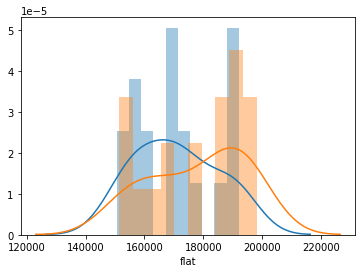

In [14]:
sns.distplot(data['high'], bins = 10)
sns.distplot(data['flat'], bins = 10)

In [16]:
data.describe()

,high,flat
count,19.000000,19.000000
mean,170810.631579,178184.210526
std,13748.423232,16113.058647
min,150565.000000,151454.000000
25%,158975.000000,165219.500000
50%,170485.000000,184386.000000
75%,180100.000000,191386.500000
max,192110.000000,198118.000000


In [17]:
data['difference'] = data.high - data.flat
data.head()

,high,flat,difference
0,189158.0,188777.0,381.0
1,192110.0,196981.0,-4871.0
2,176194.0,190510.0,-14316.0
3,156349.0,184603.0,-28254.0
4,161981.0,192341.0,-30360.0


In [19]:
u = data['difference'].mean() 
s = data['difference'].std()
u, s

(-7373.578947368421, 19471.738275755768)

In [22]:
# Calculate the t-statistic with the point estimate
n=len(data)
se = s/n**0.5
t = u / se 
n, se, t


(19, 4467.123126268016, -1.6506325746898667)

In [25]:
ddof = n -1
p=stats.t.sf(abs(t),ddof)
p

0.05807659459011118

In [26]:
alpha = .05
p < alpha / 2 # two sided

False

In [27]:
# A quicker way to perform a dependent t-test is to call the scipy
# function ttest_rel on both samples to get our t-statistic and 
# p value
t_statistic, p = stats.ttest_rel(data.high, data.flat)
t_statistic, p

(-1.6506325746898667, 0.11615318918022235)

## Confidence interval

In [29]:
# Calculate t-critical to use with our confidence interval
t_score = abs(stats.t.ppf(alpha / 2, ddof)) # two sided
t_score

2.10092204024096